# Análise de dados: Reclamações de consumidores com empresa de telecomunicações

Neste projeto serão analisados os dados de reclamações de consumidores com uma empresa de telecomunicações no 1º semestre de 2021, são dados (.csv) reais extraídos do site [consumidor.gov.br](https://www.consumidor.gov.br) disponibilizados pelo [Portal de dados do Ministério da Justiça](http://dados.mj.gov.br/).

## Demanda do negócio

- Identificar público com maior insatisfação
- Reduzir o número de reclamações
- Reduzir o tempo para solução do problema
- Obter a melhor nota em atendimento
- Identificar os motivos das reclamações

## Indagações a serem respondidas pela análise exploratória dos dados

1. Qual a quantidade/percentual de reclamações por estado?
2. Qual a quantidade/percentual de reclamações por sexo?
3. Qual a quantidade/percentual de reclamações por faixa etária?
4. Qual a quantidade/percentual das reclamações por sexo/faixa etária?
5. Quais os meios utilizados para aquisição/contratação de produtos/serviços reclamados?
6. Quais os produtos/serviços que são o assunto das reclamações?
7. Qual a quantidade/percentual dos grupos de problemas apontados pelo consumidor?
8. Qual a distribuição dos grupos de problemas entre os três maiores produtos/serviços alvo de reclamações?
9. Qual a quantidade/percentual de dias entre abertura de reclamações válidas e resposta?
10. Quais as notas do consumidor atribuídas ao atendimento da empresa?
11. Qual a relação entre dias para resposta e avaliação do consumidor?
12. Qual a quantidade/percentual das reclamações resolvidas, não resolvidas, não avaliadas e canceladas/encerradas?
13. Qual o número/percentual de recusa de reclamações avaliadas como procedentes e improcedentes?

## Importação de pacotes

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.patches as mp
import seaborn as sns
import glob

sns.set_style('darkgrid')


## Carregamento dos dados

In [2]:
# Atribuindo ao dataframe os arquivos csv no diretório dados

lista_csv = glob.glob('dados/*.csv')

converte_csv = lambda k: pd.read_csv(k, sep=';')

df = pd.concat(map(converte_csv, lista_csv), ignore_index=True)

## Detalhes do dataframe

In [3]:
df.sample(10)

,Gestor,Canal de Origem,Região,UF,Cidade,Sexo,Faixa Etária,Ano Abertura,Mês Abertura,Data Abertura,...,Grupo Problema,Problema,Como Comprou Contratou,Procurou Empresa,Respondida,Situação,Avaliação Reclamação,Nota do Consumidor,Análise da Recusa,Grupo Econômico
334481,Superintendência de Proteção e Defesa do Consu...,Plataforma Web,NE,BA,Salvador,F,entre 41 a 50 anos,2021.0,2.0,16/02/2021,...,Cobrança / Contestação,"Cobrança de tarifas, taxas, valores não previs...",Loja física,S,S,Finalizada avaliada,Resolvida,5.0,NaN,NaN
10186,Secretaria Nacional do Consumidor,Plataforma Web,S,PR,Colônia Vitória,F,entre 31 a 40 anos,2021.0,1.0,05/01/2021,...,Cobrança / Contestação,Dificuldade / atraso na devolução de valores p...,Internet,S,S,Finalizada avaliada,Resolvida,5.0,NaN,NaN
211194,Superintendência de Proteção e Defesa do Consu...,Plataforma Web,NE,BA,Salvador,F,entre 21 a 30 anos,2021.0,2.0,02/02/2021,...,Contrato / Oferta,Oferta não cumprida / serviço não fornecido/ v...,Internet,S,S,Finalizada avaliada,Resolvida,5.0,NaN,NaN
794406,Fundação de Proteção e Defesa do Consumidor,Plataforma Web,SE,SP,São Paulo,M,entre 41 a 50 anos,2021.0,6.0,11/06/2021,...,Contrato / Oferta,Oferta não cumprida / serviço não fornecido/ v...,Internet,S,S,Finalizada não avaliada,Não Avaliada,NaN,NaN,NaN
105049,Departamento Estadual de Proteção e Defesa do ...,Plataforma Web,S,PR,Cambé,F,entre 51 a 60 anos,2020.0,12.0,25/12/2020,...,Cobrança / Contestação,Cobrança por serviço/produto não contratado / ...,Não comprei / contratei,S,N,Cancelada,NaN,NaN,Procedente,NaN
90593,Programa Estadual de Proteção e Defesa do Cons...,Plataforma Web,NE,CE,Fortaleza,M,entre 31 a 40 anos,2020.0,12.0,20/12/2020,...,Informação,"Dados pessoais ou financeiros consultados, col...",Internet,S,S,Finalizada não avaliada,Não Avaliada,NaN,NaN,NaN
859364,Superintendência de Proteção e Defesa do Consu...,Plataforma Web,NE,BA,Iguaí,M,entre 21 a 30 anos,2021.0,7.0,02/07/2021,...,Contrato / Oferta,Recusa em cancelar compra/serviço no prazo de ...,Internet,S,S,Finalizada avaliada,Não Resolvida,1.0,NaN,NaN
867708,Superintendência de Proteção e Defesa do Consu...,Plataforma Web,NE,BA,Salvador,F,entre 41 a 50 anos,2021.0,7.0,06/07/2021,...,Cobrança / Contestação,"Cobrança de tarifas, taxas, valores não previs...",Loja física,N,S,Finalizada não avaliada,Não Avaliada,NaN,NaN,NaN
871168,Programa Estadual de Proteção e Defesa do Cons...,Plataforma Web,SE,MG,Congonhas,M,entre 21 a 30 anos,2021.0,7.0,07/07/2021,...,Contrato / Oferta,Oferta não cumprida / serviço não fornecido/ v...,Internet,S,S,Finalizada não avaliada,Não Avaliada,NaN,NaN,NaN
105250,Fundação de Proteção e Defesa do Consumidor,Plataforma Web,SE,SP,São Paulo,M,entre 61 a 70 anos,2020.0,12.0,25/12/2020,...,Contrato / Oferta,Dificuldade para contratar / recusa injustificada,Telefone,S,S,Finalizada avaliada,Resolvida,5.0,NaN,NaN


In [4]:
df.columns

Index(['Gestor', 'Canal de Origem', 'Região', 'UF', 'Cidade', 'Sexo',
       'Faixa Etária', 'Ano Abertura', 'Mês Abertura', 'Data Abertura',
       'Data Resposta', 'Data Análise', 'Data Recusa', 'Data Finalização',
       'Prazo Resposta', 'Prazo Analise Gestor', 'Tempo Resposta',
       'Nome Fantasia', 'Segmento de Mercado', 'Área', 'Assunto',
       'Grupo Problema', 'Problema', 'Como Comprou Contratou',
       'Procurou Empresa', 'Respondida', 'Situação', 'Avaliação Reclamação',
       'Nota do Consumidor', 'Análise da Recusa', 'Grupo Econômico'],
      dtype='object')

In [5]:
df.shape

(897662, 31)

## Seleção das linhas e colunas relevantes

In [6]:
# Selecionando a empresa alvo da análise

df = df.loc[df['Nome Fantasia'] == 'Vivo - Telefônica']
df.shape

(58278, 31)

In [7]:
# Removendo as colunas que não serão utilizadas na análise

df = df.drop(columns=[
    'Gestor','Região','Cidade','Ano Abertura','Data Abertura',
    'Data Resposta','Data Análise','Data Recusa','Área','Problema',
    'Data Finalização','Prazo Resposta','Grupo Econômico',
    'Prazo Analise Gestor','Nome Fantasia','Segmento de Mercado',
    'Procurou Empresa','Respondida'])
df.shape

(58278, 13)

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 58278 entries, 30 to 897598
Data columns (total 13 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Canal de Origem         58278 non-null  object 
 1   UF                      58278 non-null  object 
 2   Sexo                    58274 non-null  object 
 3   Faixa Etária            58278 non-null  object 
 4   Mês Abertura            58278 non-null  float64
 5   Tempo Resposta          51396 non-null  float64
 6   Assunto                 58278 non-null  object 
 7   Grupo Problema          58278 non-null  object 
 8   Como Comprou Contratou  58278 non-null  object 
 9   Situação                58278 non-null  object 
 10  Avaliação Reclamação    51387 non-null  object 
 11  Nota do Consumidor      31028 non-null  float64
 12  Análise da Recusa       7848 non-null   object 
dtypes: float64(3), object(10)
memory usage: 6.2+ MB


In [9]:
# Será considerado apenas as reclamações abertas entre janeiro e junho
# meses anteriores e posteriores ao período serão excluídos.

print(df['Mês Abertura'].unique())

df_remover = df.loc[
    (df['Mês Abertura'] == 11) | 
    (df['Mês Abertura'] == 12) | 
    (df['Mês Abertura'] == 7)
    ]

df = df.drop(df_remover.index)

print(df['Mês Abertura'].unique())

[ 1. 11. 12.  2.  3.  4.  5.  6.  7.]
[1. 2. 3. 4. 5. 6.]


## Tratando valores nulos

In [10]:
df.isnull().sum()

Canal de Origem               0
UF                            0
Sexo                          4
Faixa Etária                  0
Mês Abertura                  0
Tempo Resposta             6015
Assunto                       0
Grupo Problema                0
Como Comprou Contratou        0
Situação                      0
Avaliação Reclamação       6023
Nota do Consumidor        23484
Análise da Recusa         43220
dtype: int64

In [11]:
# Coluna [Sexo]
# Quando o valor do campo for nulo será considerado "O" outros.

print(df['Sexo'].unique())
df['Sexo'].fillna('O', inplace=True)
print(df['Sexo'].unique())
df['Sexo'].isnull().sum()

['M' 'F' 'O' nan]
['M' 'F' 'O']


0

In [12]:
# Coluna [Tempo Resposta]
# Quando nulo é referente a reclamações canceladas por serem improcedentes ou encerradas.
# Quando nulo será considerado 0 "zero".

print(df['Tempo Resposta'].unique())
df['Tempo Resposta'].fillna(0, inplace=True)
print(df['Tempo Resposta'].unique())
df['Tempo Resposta'].isnull().sum()


[ 5.  6. nan  3.  7.  4. 10. 12.  9. 11.  8.  2. 15.  1. 13. 14.  0.]
[ 5.  6.  0.  3.  7.  4. 10. 12.  9. 11.  8.  2. 15.  1. 13. 14.]


0

In [13]:
# Coluna [Avaliação Reclamação]
# Quando nulo as reclamações foram canceladas por serem improcedentes
# ou encerradas quando não avaliadas em tempo hábil pelo orgão gestor de reclamações.
# Quando nulo será considerado o valor correspondente da coluna 'Situação'.

print(df['Avaliação Reclamação'].unique()) 
df.loc[df['Avaliação Reclamação'].isnull(), 'Avaliação Reclamação'] = df['Situação']
print(df['Avaliação Reclamação'].unique()) 
df['Avaliação Reclamação'].isnull().sum()


['Resolvida' nan 'Não Avaliada' 'Não Resolvida']
['Resolvida' 'Cancelada' 'Não Avaliada' 'Não Resolvida' 'Encerrada']


0

In [14]:
# Coluna [Nota do Consumidor]
# Quando nulo as reclamações foram canceladas por serem improcedentes
# ou encerradas quando não avaliadas em tempo hábil pelo orgão gestor de reclamações.
# Quando nulo será considerado 0 "zero".

print(df['Nota do Consumidor'].unique())
df['Nota do Consumidor'].fillna(0, inplace=True)
print(df['Nota do Consumidor'].unique())
df['Nota do Consumidor'].isnull().sum()

[ 5. nan  4.  3.  1.  2.]
[5. 0. 4. 3. 1. 2.]


0

In [15]:
# Coluna [Análise da Recusa]
# Quando nulo não houve recusa da reclamação pela empresa reclamada.
# Quando nulo será atribuido a informação 'Não Contestada'.

print(df['Análise da Recusa'].unique())
df.loc[df['Análise da Recusa'].isnull(), 'Análise da Recusa'] = 'Não Contestada'
print(df['Análise da Recusa'].unique())
df['Análise da Recusa'].isnull().sum()

[nan 'Procedente' 'Encerrada' 'Improcedente']
['Não Contestada' 'Procedente' 'Encerrada' 'Improcedente']


0

## Tratando os tipos de valores

In [16]:
df.dtypes

Canal de Origem            object
UF                         object
Sexo                       object
Faixa Etária               object
Mês Abertura              float64
Tempo Resposta            float64
Assunto                    object
Grupo Problema             object
Como Comprou Contratou     object
Situação                   object
Avaliação Reclamação       object
Nota do Consumidor        float64
Análise da Recusa          object
dtype: object

In [17]:
df['Mês Abertura'] = df['Mês Abertura'].astype('int8', errors='ignore')
df['Tempo Resposta'] = df['Tempo Resposta'].astype('int8', errors='ignore')
df['Nota do Consumidor'] = df['Nota do Consumidor'].astype('int8', errors='ignore')

df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 50062 entries, 30 to 854051
Data columns (total 13 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   Canal de Origem         50062 non-null  object
 1   UF                      50062 non-null  object
 2   Sexo                    50062 non-null  object
 3   Faixa Etária            50062 non-null  object
 4   Mês Abertura            50062 non-null  int8  
 5   Tempo Resposta          50062 non-null  int8  
 6   Assunto                 50062 non-null  object
 7   Grupo Problema          50062 non-null  object
 8   Como Comprou Contratou  50062 non-null  object
 9   Situação                50062 non-null  object
 10  Avaliação Reclamação    50062 non-null  object
 11  Nota do Consumidor      50062 non-null  int8  
 12  Análise da Recusa       50062 non-null  object
dtypes: int8(3), object(10)
memory usage: 5.4+ MB


In [18]:
df.count()

Canal de Origem           50062
UF                        50062
Sexo                      50062
Faixa Etária              50062
Mês Abertura              50062
Tempo Resposta            50062
Assunto                   50062
Grupo Problema            50062
Como Comprou Contratou    50062
Situação                  50062
Avaliação Reclamação      50062
Nota do Consumidor        50062
Análise da Recusa         50062
dtype: int64

## 1. Qual a quantidade/percentual de reclamações por estado?

       UF          %
SP  12695  25.358555
RS  10821  21.615197
MG   4871   9.729935
PR   4226   8.441532
RJ   2735   5.463226
ES   2237   4.468459
BA   2030   4.054972
DF   1779   3.553594
SC   1767   3.529623
GO   1480   2.956334
MT    978   1.953578
PE    774   1.546083
CE    617   1.232472
AM    457   0.912868
PB    393   0.785027
MA    388   0.775039
MS    381   0.761056
PA    328   0.655188
SE    266   0.531341
PI    227   0.453438
AC    141   0.281651
AL    116   0.231713
RO     97   0.193760
RN     94   0.187767
TO     91   0.181775
AP     42   0.083896
RR     31   0.061923


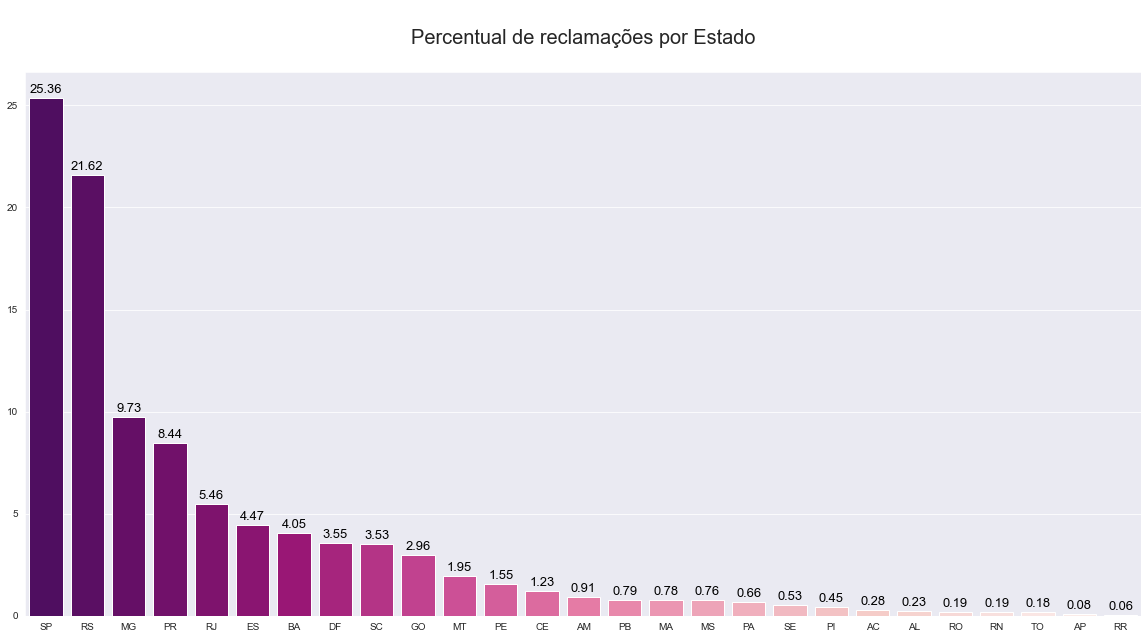

In [19]:
df_uf_valores = df['UF'].value_counts()
df_uf_perc = pd.DataFrame(df_uf_valores)

soma_uf_valores = df_uf_valores.sum()

df_uf_perc['%'] = df_uf_perc['UF'] / soma_uf_valores * 100

print(df_uf_perc)

plt.figure(figsize = (20, 10))
plot = sns.barplot(x = df_uf_perc.index, 
                    y = df_uf_perc['%'], 
                    orient = "v", 
                    palette = "RdPu_r")
for i in plot.patches:
    plot.annotate(format(i.get_height(), '.2f'),
                (i.get_x() + i.get_width() / 2, i.get_height()), 
                ha = 'center',
                va = 'baseline',
                fontsize = 13,
                color = 'black',
                xytext = (0, 5),
                textcoords = 'offset points')
plt.xlabel('')
plt.ylabel('')
plt.title('\nPercentual de reclamações por Estado\n', fontsize = 20)
plt.show(plot)


Os estados de São Paulo (SP) com 25,36% (1º lugar) e Rio Grande do Sul (RS) 21,62% (2º lugar) **juntos concentram mais 46% do total de reclamações**, seguidos de Minas Gerais (MG) com 9,73% (3º lugar) e Paraná (PR) com 8,44% (4º lugar), estes dois últimos somados (18,17%) ainda ficam abaixo do 2º colocado.


## 2. Qual a quantidade/percentual de reclamações por sexo?

    Sexo          %
M  28178  56.286205
F  21854  43.653869
O     30   0.059926


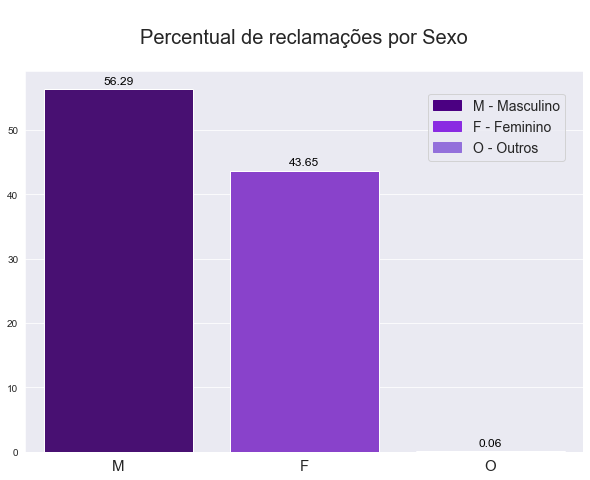

In [20]:
df_sexo_valores = df['Sexo'].value_counts()
df_sexo_perc = pd.DataFrame(df_sexo_valores)

soma_sexo_valores = df_sexo_valores.sum()

df_sexo_perc['%'] = df_sexo_perc['Sexo'] / soma_sexo_valores * 100

print(df_sexo_perc)

df_sexo_perc['Sexo'] = df_sexo_perc.index

plt.figure(figsize = (10, 7))
plt.rcParams['xtick.labelsize'] = 15
plot = sns.barplot(data = df_sexo_perc, 
                    x = 'Sexo', y = '%', 
                    orient = 'v',
                    palette = ['indigo','blueviolet','mediumpurple'])
for i in plot.patches:
    plot.annotate(format(i.get_height(), '.2f'),
                (i.get_x() + i.get_width() / 2, i.get_height() + 0.7), 
                ha = 'center',
                va = 'baseline',
                fontsize = 12,
                color = 'black',
                xytext = (0, 1),
                textcoords = 'offset points')
plt.xlabel('')
plt.ylabel('')
plt.title('\nPercentual de reclamações por Sexo\n', fontsize = 20)
M = mp.Patch(color = 'indigo', label = "M - Masculino")
F = mp.Patch(color = 'blueviolet', label = "F - Feminino")
O = mp.Patch(color = 'mediumpurple', label = "O - Outros")
plt.legend(handles = [M,F,O], loc = 'upper right', bbox_to_anchor = (0.98, 0.96), fontsize = 14)
plt.show(plot)



Pessoas do **sexo masculino (M) respondem por mais da metade** das reclamações, 56,29%, superando a somatória dos outros grupos, feminino (F) e outros (O).


## 3. Qual a quantidade/percentual de reclamações por faixa etária?

                    Faixa Etária          %
entre 31 a 40 anos         15992  31.944389
entre 21 a 30 anos         11356  22.683872
entre 41 a 50 anos          9895  19.765491
entre 51 a 60 anos          6619  13.221605
entre 61 a 70 anos          3958   7.906196
mais de 70 anos             1658   3.311893
até 20 anos                  584   1.166553


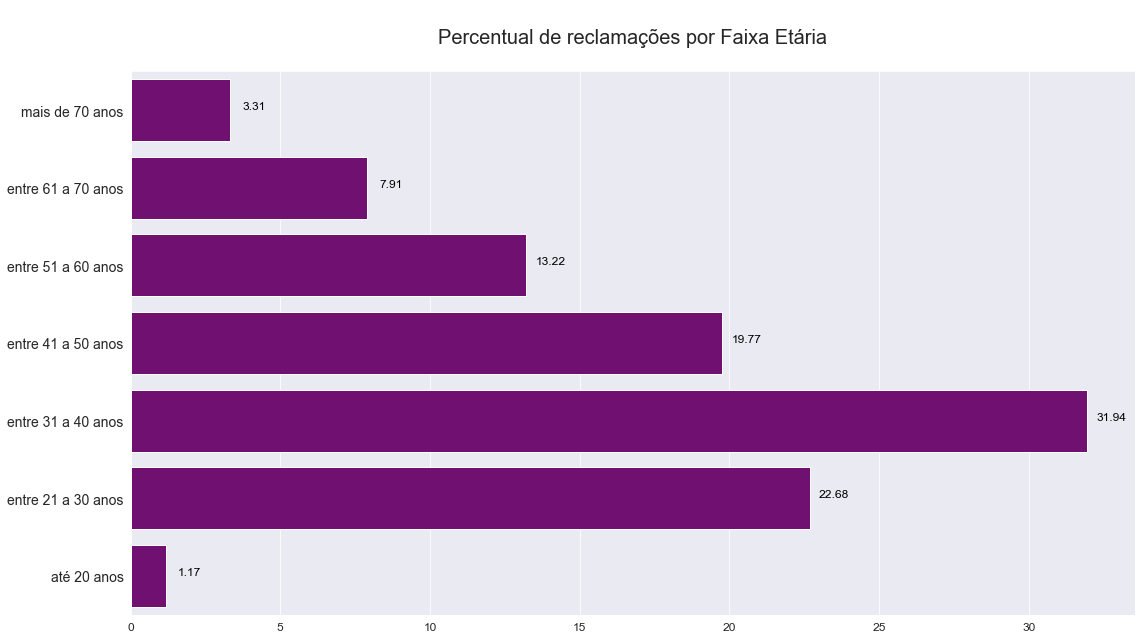

In [21]:
df_faixa_valores = df['Faixa Etária'].value_counts()
df_faixa_perc = pd.DataFrame(df_faixa_valores)

soma_faixa_valores = df_faixa_valores.sum()

df_faixa_perc['%'] = df_faixa_perc['Faixa Etária'] / soma_faixa_valores * 100

print(df_faixa_perc)

df_faixa_perc['Faixa Etária'] = df_faixa_perc.index

plt.figure(figsize = (18, 10))
plt.rcParams['xtick.labelsize'] = 12
plt.rcParams['ytick.labelsize'] = 14
plot = sns.barplot(data = df_faixa_perc, 
                    x = '%', y = 'Faixa Etária', 
                    orient = 'h',
                    palette = ['purple'],
                    order = ['mais de 70 anos',
                            'entre 61 a 70 anos',
                            'entre 51 a 60 anos',
                            'entre 41 a 50 anos',
                            'entre 31 a 40 anos',
                            'entre 21 a 30 anos',
                            'até 20 anos'])
for i in plot.patches:
    plot.annotate(format(i.get_width(), '.2f'),
                (i.get_width() + 0.8, i.get_y() + i.get_height() / 2), 
                ha = 'center',
                va = 'baseline',
                fontsize = 12,
                color = 'black',
                xytext = (0, 1),
                textcoords = 'offset points')
plt.xlabel('')
plt.ylabel('')
plt.title('\nPercentual de reclamações por Faixa Etária\n', fontsize = 20)
plt.show(plot)

**A faixa etária com os maior percentual de reclamações está entre 31 a 40 anos (31,94%)**, sendo que se somarmos também entre 21 a 30 anos (22,68%) teriamos um percentual de **54,62% de reclamações concentradas apenas em duas faixas etárias** dentro de um conjunto de sete faixas de idade.

## 4. Qual a quantidade/percentual das reclamações por sexo/faixa etária?

                         Faixa Etária          %
Sexo Faixa Etária                               
F    entre 31 a 40 anos          6256  12.496504
     entre 21 a 30 anos          4957   9.901722
     entre 41 a 50 anos          4315   8.619312
     entre 51 a 60 anos          3223   6.438017
     entre 61 a 70 anos          2018   4.031002
     mais de 70 anos              830   1.657944
     até 20 anos                  255   0.509368
M    entre 31 a 40 anos          9728  19.431904
     entre 21 a 30 anos          6392  12.768167
     entre 41 a 50 anos          5574  11.134194
     entre 51 a 60 anos          3395   6.781591
     entre 61 a 70 anos          1935   3.865207
     mais de 70 anos              827   1.651952
     até 20 anos                  327   0.653190
O    entre 31 a 40 anos             8   0.015980
     entre 21 a 30 anos             7   0.013983
     entre 41 a 50 anos             6   0.011985
     entre 61 a 70 anos             5   0.009988
     até 20 anos    

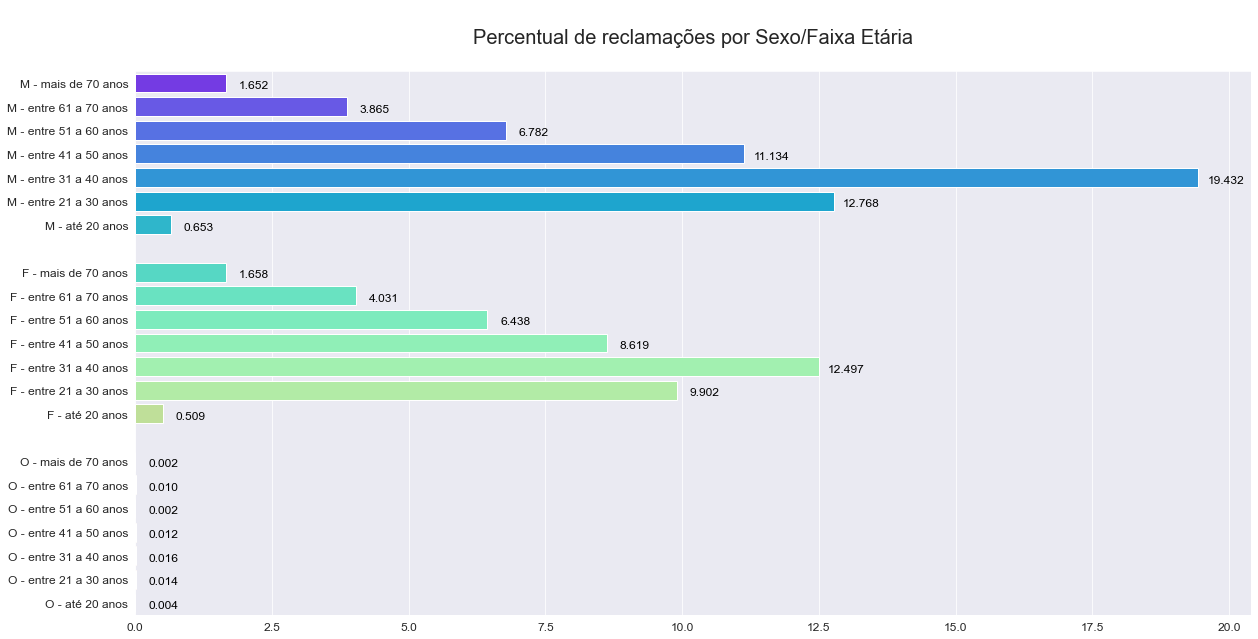

In [22]:
df_sexo_faixa_valores = df.groupby('Sexo')['Faixa Etária'].value_counts()
df_sexo_faixa_perc = pd.DataFrame(df_sexo_faixa_valores)

soma_sexo_faixa_valores = df_sexo_faixa_valores.sum()

df_sexo_faixa_perc['%'] = df_sexo_faixa_perc['Faixa Etária'] / soma_sexo_faixa_valores * 100

print(df_sexo_faixa_perc)

df_sexo_faixa_perc['Sexo/Faixa Etária'] = df_sexo_faixa_perc.index
df_sexo_faixa_perc['Sexo/Faixa Etária'] = df_sexo_faixa_perc['Sexo/Faixa Etária'].apply(lambda k: ' - '.join(k))

plt.figure(figsize = (20, 10))
plt.rcParams['xtick.labelsize'] = 12
plt.rcParams['ytick.labelsize'] = 12
plot = sns.barplot(data = df_sexo_faixa_perc, 
                    y = 'Sexo/Faixa Etária', x = '%', orient = 'h', palette = "rainbow",
                    order = [
                    "M - mais de 70 anos",
                    "M - entre 61 a 70 anos",
                    "M - entre 51 a 60 anos",
                    "M - entre 41 a 50 anos",
                    "M - entre 31 a 40 anos",
                    "M - entre 21 a 30 anos",
                    "M - até 20 anos",
                    "",
                    "F - mais de 70 anos",
                    "F - entre 61 a 70 anos",
                    "F - entre 51 a 60 anos",
                    "F - entre 41 a 50 anos",
                    "F - entre 31 a 40 anos",
                    "F - entre 21 a 30 anos",
                    "F - até 20 anos",
                    "",
                    "O - mais de 70 anos",
                    "O - entre 61 a 70 anos",
                    "O - entre 51 a 60 anos",
                    "O - entre 41 a 50 anos",
                    "O - entre 31 a 40 anos",
                    "O - entre 21 a 30 anos",
                    "O - até 20 anos"])
for i in plot.patches:
    plot.annotate(format(i.get_width(), '.3f'),
                (i.get_width() + 0.6, i.get_y() + i.get_height() / 2), 
                ha = 'center',
                va = 'baseline',
                fontsize = 12,
                color = 'black',
                xytext = (-5, -5),
                textcoords = 'offset points')
plt.xlabel('')
plt.ylabel('')
plt.title('\nPercentual de reclamações por Sexo/Faixa Etária\n', fontsize = 20)
plt.show(plot)


**Clientes do sexo masculino e na faixa etária entre 31 a 40 anos (19,43%) são os que mais apresentaram reclamações**, sendo seguidos por clientes na faixa etária entre 21 a 30 anos (12,77%), em terceiro há uma mudança, clientes do sexo feminino e na faixa etária entre 31 a 40 anos (12,50%), se somarmos esses três grupos teriamos um percentual de **44,70% de reclamações concentradas apenas em três faixas etárias separadas por sexo.**

## 5. Quais os meios utilizados para aquisição/contratação de produtos/serviços reclamados?

                         Como Comprou Contratou          %
Telefone                                  18751  37.455555
Internet                                  10383  20.740282
Loja física                                9433  18.842635
Não comprei / contratei                    9030  18.037633
Domicílio                                  1690   3.375814
SMS / Mensagem de texto                     303   0.605249
Ganhei de presente                          169   0.337581
Stand, feiras e eventos                     162   0.323599
Catálogo                                    141   0.281651


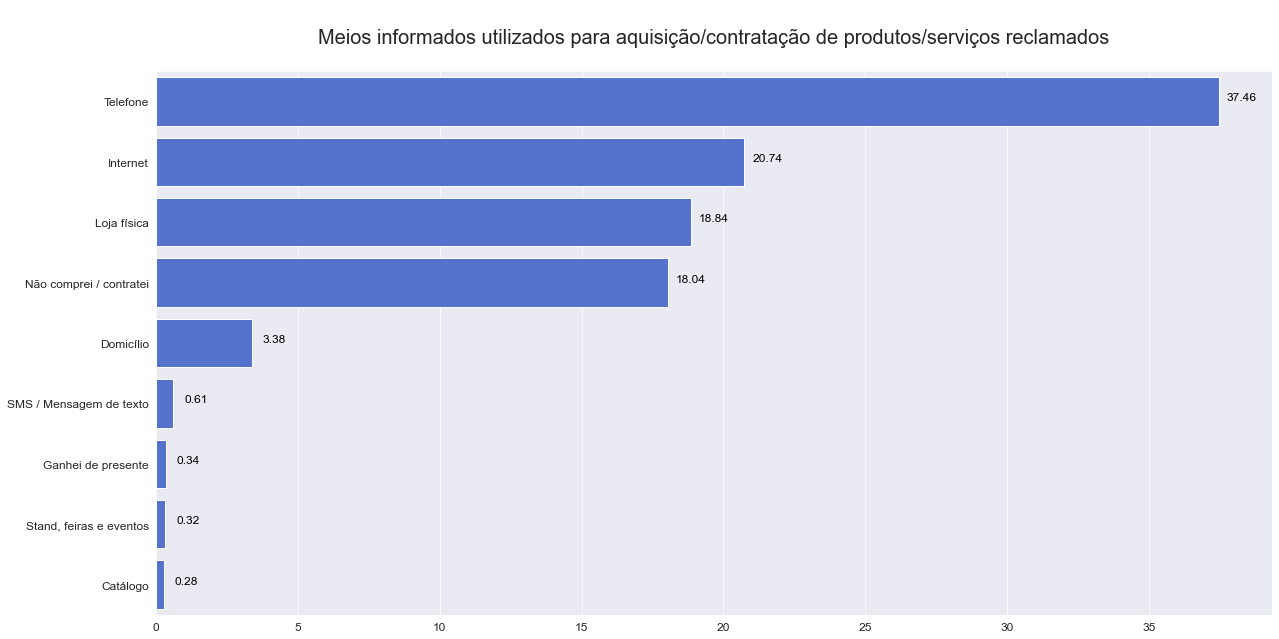

In [23]:
df_comprou_valores = df['Como Comprou Contratou'].value_counts()
df_comprou_perc = pd.DataFrame(df_comprou_valores)

soma_comprou_valores = df_comprou_valores.sum()

df_comprou_perc['%'] = df_comprou_perc['Como Comprou Contratou'] / soma_comprou_valores * 100

print(df_comprou_perc)

df_comprou_perc['Como Comprou Contratou'] = df_comprou_perc.index

plt.figure(figsize = (20, 10))
plot = sns.barplot(data = df_comprou_perc,
                    x = '%', y = 'Como Comprou Contratou',
                    orient = 'h',
                    palette = ['royalblue'])
for i in plot.patches:
    plot.annotate(format(i.get_width(), '.2f'),
                (i.get_width() + 0.8, i.get_y() + i.get_height() / 2),
                ha = 'center',
                va = 'baseline',
                fontsize = 12,
                color = 'black',
                xytext = (0,1),
                textcoords = 'offset points')
plt.xlabel('')
plt.ylabel('')
plt.title('\nMeios informados utilizados para aquisição/contratação de produtos/serviços reclamados\n', fontsize = 20)
plt.show(plot)

**O telefone com 37,46%** foi o meio mais utilizado pelo consumidores para aquisição/contratação de produtos/serviços que foram alvos de reclamações, destaque também para a quarta posição onde **18,04% dos consumidores informaram que não compraram/contrataram qualquer produto/serviço.**

## 6. Quais os produtos/serviços que são o assunto das reclamações?

                                                  Assunto          %
Telefonia Móvel Pós-paga                            15628  31.217291
Internet Fixa                                        8394  16.767209
Pacote de Serviços ( Combo )                         5951  11.887260
Telefonia Móvel Pré-paga                             5458  10.902481
Aparelho celular                                     3666   7.322920
Internet Móvel                                       3601   7.193081
Telefonia Fixa                                       2273   4.540370
Aparelho de telefone fixo / interfone                1753   3.501658
Demais aparelhos de comunicação                      1716   3.427750
TV por Assinatura                                     713   1.424234
Demais Seguros (exceto habitacional)                  422   0.842955
Microcomputador e laptops                             216   0.431465
Seguro Habitacional / Residencial                     119   0.237705
Seguro de Vida / Acidentes Pessoai

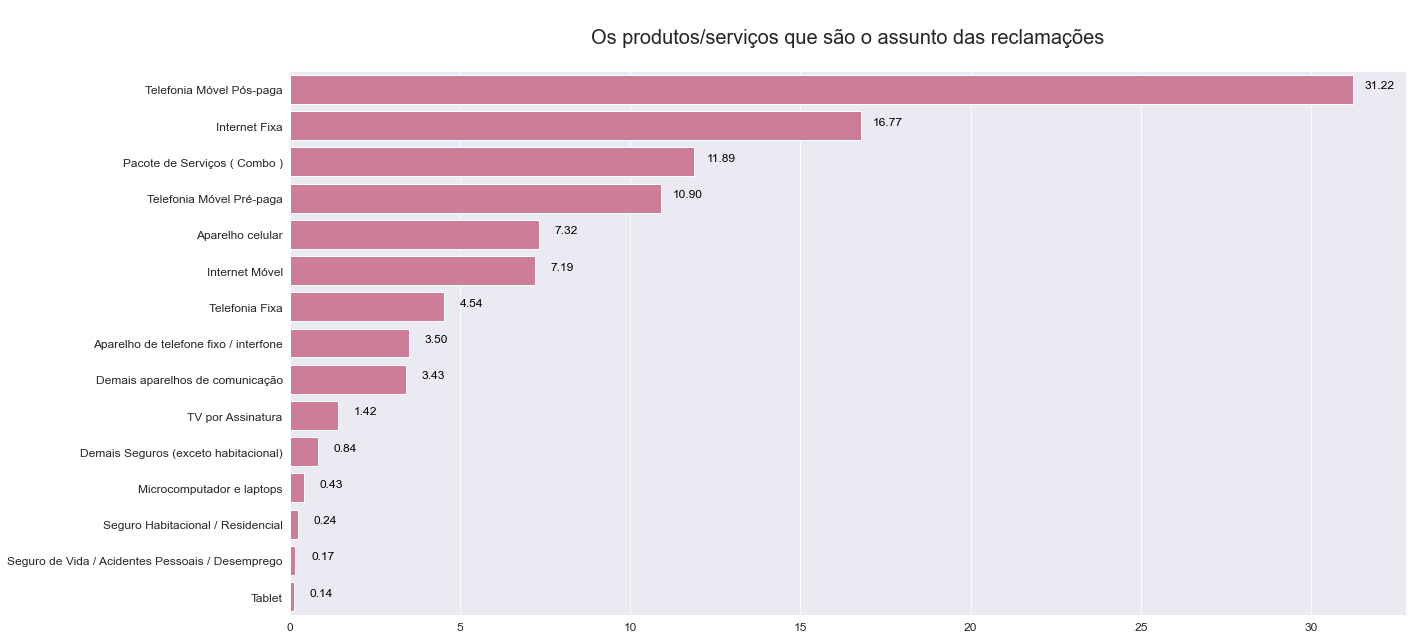

In [24]:
df_assunto_valores = df['Assunto'].value_counts()
df_assunto_perc = pd.DataFrame(df_assunto_valores)

soma_assunto_valores = df_assunto_valores.sum()

df_assunto_perc['%'] = df_assunto_perc['Assunto'] / soma_assunto_valores * 100

print(df_assunto_perc)

df_assunto_perc['Assunto'] = df_assunto_perc.index

plt.figure(figsize = (20, 10))
plot = sns.barplot(data = df_assunto_perc,
                    x = '%', y = 'Assunto',
                    orient = 'h',
                    palette = ['palevioletred'])
for i in plot.patches:
    plot.annotate(format(i.get_width(), '.2f'),
                (i.get_width() + 0.8, i.get_y() + i.get_height() / 2),
                ha = 'center',
                va = 'baseline',
                fontsize = 12,
                color = 'black',
                xytext = (0,1),
                textcoords = 'offset points')
plt.xlabel('')
plt.ylabel('')
plt.title('\nOs produtos/serviços que são o assunto das reclamações\n', fontsize = 20)
plt.show(plot)

**A telefonia móvel pós-paga com 31,22% é a líder de reclamações**, em segundo temos a internet fixa com 16,77%, o pacote de serviços (combo) está em terceiro com 11,89, apenas somando o **primeiro e segundo lugar representam 47,99% dos produtos/serviços alvos de reclamações.**

## 7. Qual a quantidade/percentual dos grupos de problemas apontados pelo consumidor?

                        Grupo Problema          %
Cobrança / Contestação           20607  41.162958
Vício de Qualidade               11399  22.769765
Contrato / Oferta                10016  20.007191
Atendimento / SAC                 6991  13.964684
Informação                         550   1.098638
Entrega do Produto                 460   0.918861
Saúde e Segurança                   39   0.077903


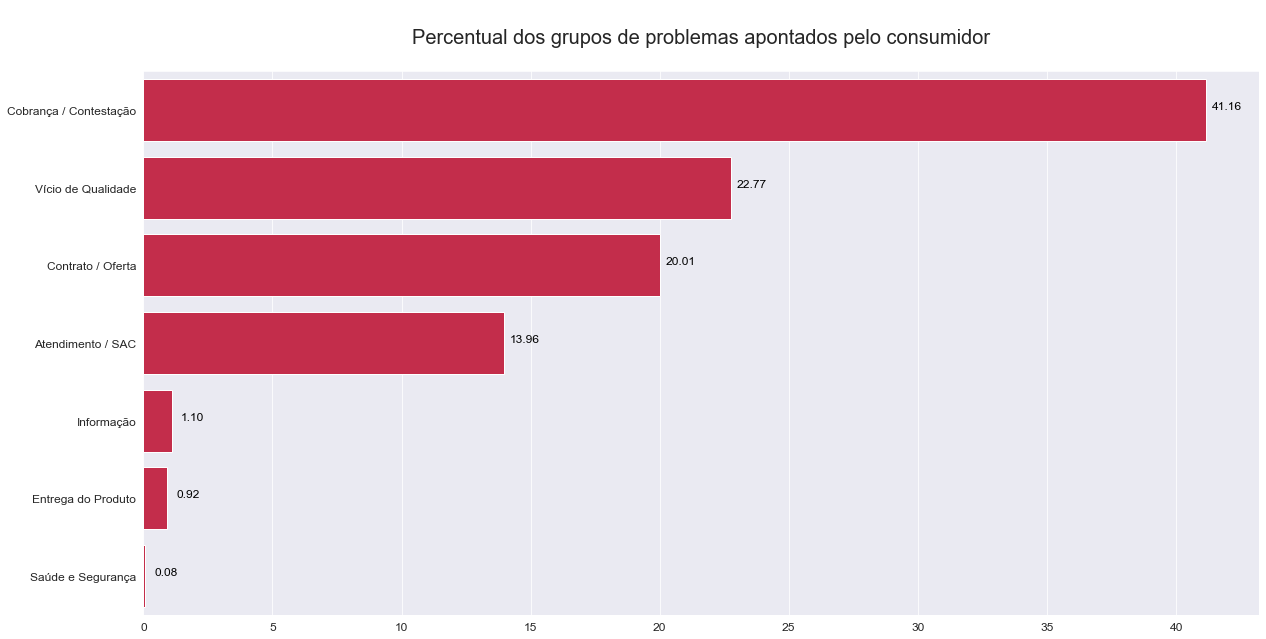

In [25]:
df_problema_valores = df['Grupo Problema'].value_counts()
df_problema_perc = pd.DataFrame(df_problema_valores)

soma_problema_valores = df_problema_valores.sum()

df_problema_perc['%'] = df_problema_perc['Grupo Problema'] / soma_problema_valores * 100

print(df_problema_perc)

df_problema_perc['Grupo Problema'] = df_problema_perc.index

plt.figure(figsize = (20, 10))
plot = sns.barplot(data = df_problema_perc,
                    x = '%', y = 'Grupo Problema',
                    orient = 'h',
                    palette = ['crimson'])
for i in plot.patches:
    plot.annotate(format(i.get_width(), '.2f'),
                (i.get_width() + 0.8, i.get_y() + i.get_height() / 2),
                ha = 'center',
                va = 'baseline',
                fontsize = 12,
                color = 'black',
                xytext = (0,1),
                textcoords = 'offset points')
plt.xlabel('')
plt.ylabel('')
plt.title('\nPercentual dos grupos de problemas apontados pelo consumidor\n', fontsize = 20)
plt.show(plot)

**Cobrança/Contestação (41,16%) é o grupo líder das reclamações**, seguido de **vício de qualidade (22,77%)** e em terceiro **contrato/oferta (20,01%).**

## 8. Qual a distribuição dos grupos de problemas entre os três maiores produtos/serviços alvo de reclamações?

                                                     Grupo Problema          %
Assunto                      Grupo Problema                                   
Telefonia Móvel Pós-paga     Cobrança / Contestação            5707  19.040470
                             Vício de Qualidade                5309  17.712608
                             Contrato / Oferta                 3016  10.062389
                             Atendimento / SAC                 1481   4.941114
                             Informação                         115   0.383679
Internet Fixa                Cobrança / Contestação            3418  11.403597
                             Contrato / Oferta                 1899   6.335702
                             Atendimento / SAC                 1501   5.007840
                             Vício de Qualidade                1475   4.921096
                             Informação                         101   0.336970
Pacote de Serviços ( Combo ) Cobrança / Contestação 

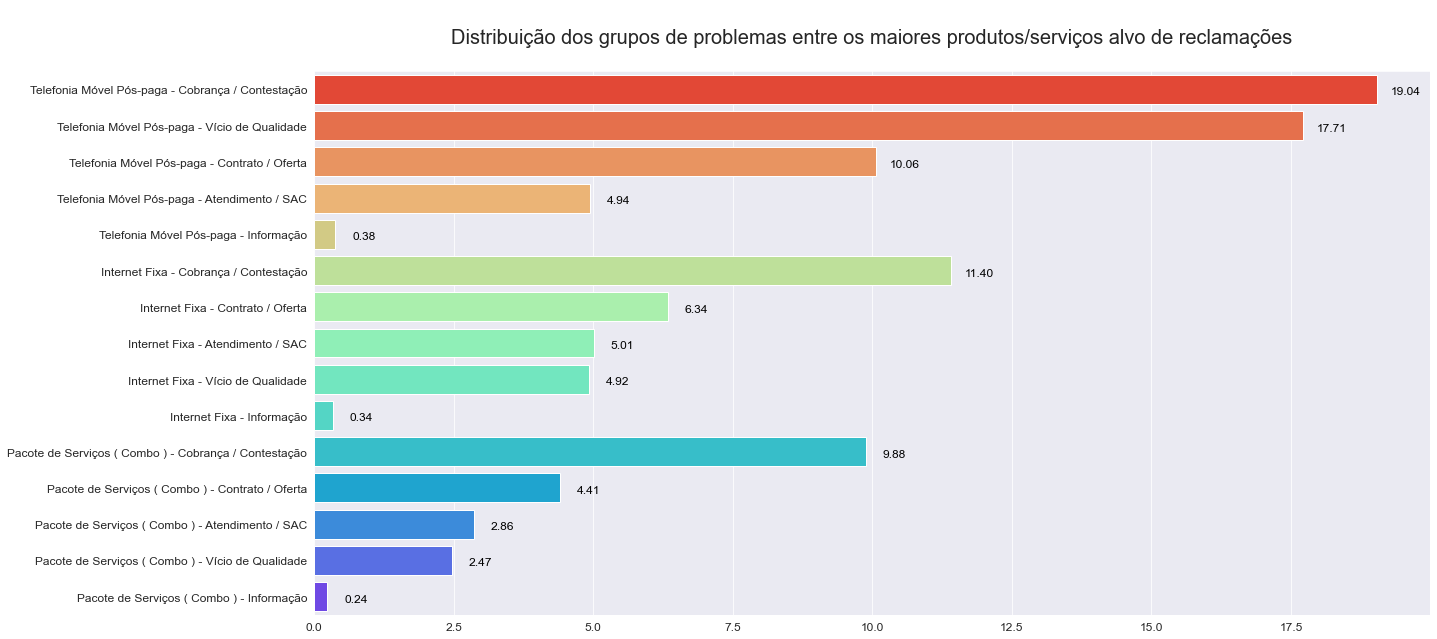

In [26]:
df_assunto_prob_valores = df.groupby('Assunto')['Grupo Problema'].value_counts().loc[['Telefonia Móvel Pós-paga','Internet Fixa','Pacote de Serviços ( Combo )']]
df_assunto_prob_perc = pd.DataFrame(df_assunto_prob_valores)

soma_assunto_prob_valores = df_assunto_prob_valores.sum()

df_assunto_prob_perc['%'] = df_assunto_prob_perc['Grupo Problema'] / soma_assunto_prob_valores * 100

print(df_assunto_prob_perc)

df_assunto_prob_perc['Assunto/Problema'] = df_assunto_prob_perc.index
df_assunto_prob_perc['Assunto/Problema'] = df_assunto_prob_perc['Assunto/Problema'].apply(lambda k: ' - '.join(k))

plt.figure(figsize = (20, 10))
plt.rcParams['xtick.labelsize'] = 12
plt.rcParams['ytick.labelsize'] = 12
plot = sns.barplot(data = df_assunto_prob_perc, 
                    y = 'Assunto/Problema', x = '%', 
                    orient = 'h', 
                    palette = 'rainbow_r')
for i in plot.patches:
    plot.annotate(format(i.get_width(), '.2f'),
                (i.get_width() + 0.6, i.get_y() + i.get_height() / 2), 
                ha = 'center',
                va = 'baseline',
                fontsize = 12,
                color = 'black',
                xytext = (-5, -5),
                textcoords = 'offset points')
plt.xlabel('')
plt.ylabel('')
plt.title('\nDistribuição dos grupos de problemas entre os maiores produtos/serviços alvo de reclamações\n', fontsize = 20)
plt.show(plot)

**Cobrança/Contestação é o grupo que concentra a maior parte das reclamações** entre os produtos/serviços mais reclamados com um total de **40,32%** distribuidos entre telefonia móvel pós-paga (19,04%), internet fixa (11,40%) e pacote de serviços (combo) (9,88%).

## 9. Qual a quantidade/percentual de dias entre abertura de reclamações válidas e resposta?

    Tempo Resposta          %
8             8389  19.047295
7             7370  16.733647
9             5164  11.724905
10            4270   9.695071
6             3851   8.743728
5             2437   5.533229
11            2253   5.115455
4             2060   4.677247
3             1584   3.596485
15            1488   3.378516
12            1449   3.289967
2             1116   2.533887
13            1033   2.345435
14             878   1.993506
1              701   1.591626

Média de dias entre abertura de reclamação e resposta:  8.0


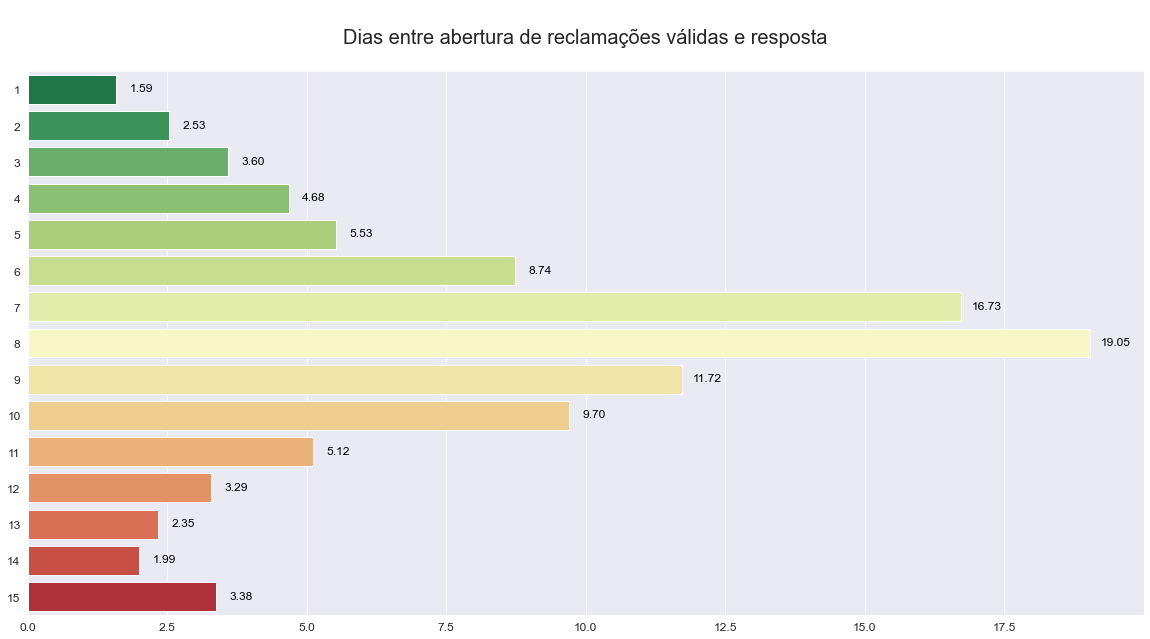

In [27]:
df_tempo_valores = df['Tempo Resposta'] > 0
df_tempo_valores = df[df_tempo_valores]
df_tempo_valores = df_tempo_valores['Tempo Resposta'].value_counts()

df_tempo_perc = pd.DataFrame(df_tempo_valores)

soma_tempo_valores = df_tempo_valores.sum()

df_tempo_perc['%'] = df_tempo_perc['Tempo Resposta'] / soma_tempo_valores * 100

print(df_tempo_perc)

df_tempo_perc['Tempo Resposta'] = df_tempo_perc.index

df_tempo_media = df_tempo_perc['Tempo Resposta'].mean()
print('\nMédia de dias entre abertura de reclamação e resposta: ', df_tempo_media)

plt.figure(figsize = (20, 10))
plot = sns.barplot(data = df_tempo_perc,
                    x = '%', y = 'Tempo Resposta',
                    orient = 'h',
                    palette = 'RdYlGn_r')
for i in plot.patches:
    plot.annotate(format(i.get_width(), '.2f'),
                (i.get_width() + 0.45, i.get_y() + i.get_height() / 2),
                ha = 'center',
                va = 'baseline',
                fontsize = 12,
                color = 'black',
                xytext = (0,-2),
                textcoords = 'offset points')
plt.xlabel('')
plt.ylabel('')
plt.title('\nDias entre abertura de reclamações válidas e resposta\n', fontsize = 20)
plt.show(plot)

**19,05% das reclamações válidas foram respondidas em 8 dias (média)**, 16,13% foram respondidas com mais de 10 dias e 17,93% foram respondidas em até 5 dias. 

## 10. Quais as notas do consumidor atribuídas ao atendimento da empresa?

   Nota do Consumidor          %
5               17641  66.374445
1                3162  11.897058
4                3141  11.818045
3                1950   7.336895
2                 684   2.573557


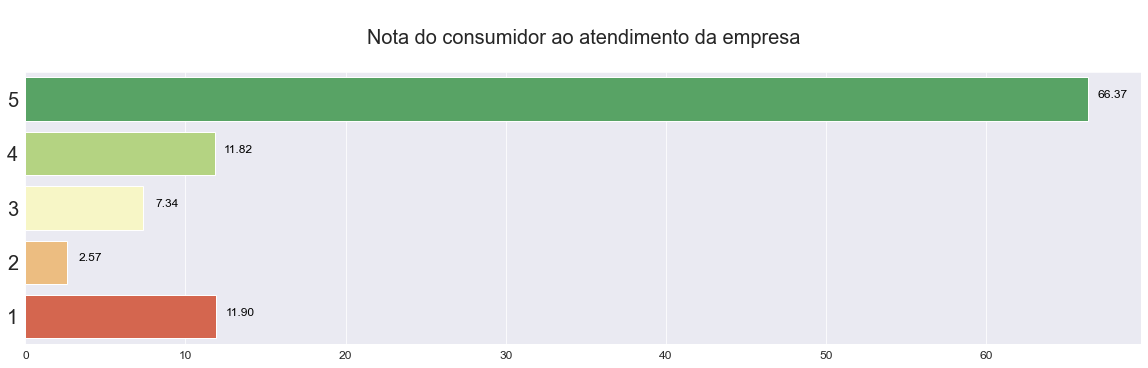

In [28]:
df_nota_valores = df['Nota do Consumidor'] > 0
df_nota_valores = df[df_nota_valores]
df_nota_valores = df_nota_valores['Nota do Consumidor'].value_counts()
df_nota_perc = pd.DataFrame(df_nota_valores)

soma_nota_valores = df_nota_valores.sum()

df_nota_perc['%'] = df_nota_perc['Nota do Consumidor'] / soma_nota_valores * 100

print(df_nota_perc)

df_nota_perc['Nota do Consumidor'] = df_nota_perc.index

plt.figure(figsize = (20, 5))
plt.rcParams['ytick.labelsize'] = 20
plot = sns.barplot(data = df_nota_perc,
                    x = '%', y = 'Nota do Consumidor',
                    orient = 'h',
                    palette = 'RdYlGn_r',
                    order = [5, 4, 3, 2, 1])
for i in plot.patches:
    plot.annotate(format(i.get_width(), '.2f'),
                (i.get_width() + 1.5, i.get_y() + i.get_height() / 2),
                ha = 'center',
                va = 'baseline',
                fontsize = 12,
                color = 'black',
                xytext = (0,1),
                textcoords = 'offset points')
plt.xlabel('')
plt.ylabel('')
plt.title('\nNota do consumidor ao atendimento da empresa\n', fontsize = 20)
plt.show(plot)

**66,37% atribuiram ao atendimento da empresa a nota máxima 5** e 11,90% atribuiram a nota miníma 1.

## 11. Qual a relação entre dias para resposta e avaliação do consumidor?


Média de dias entre abertura de reclamação e resposta:  8.0


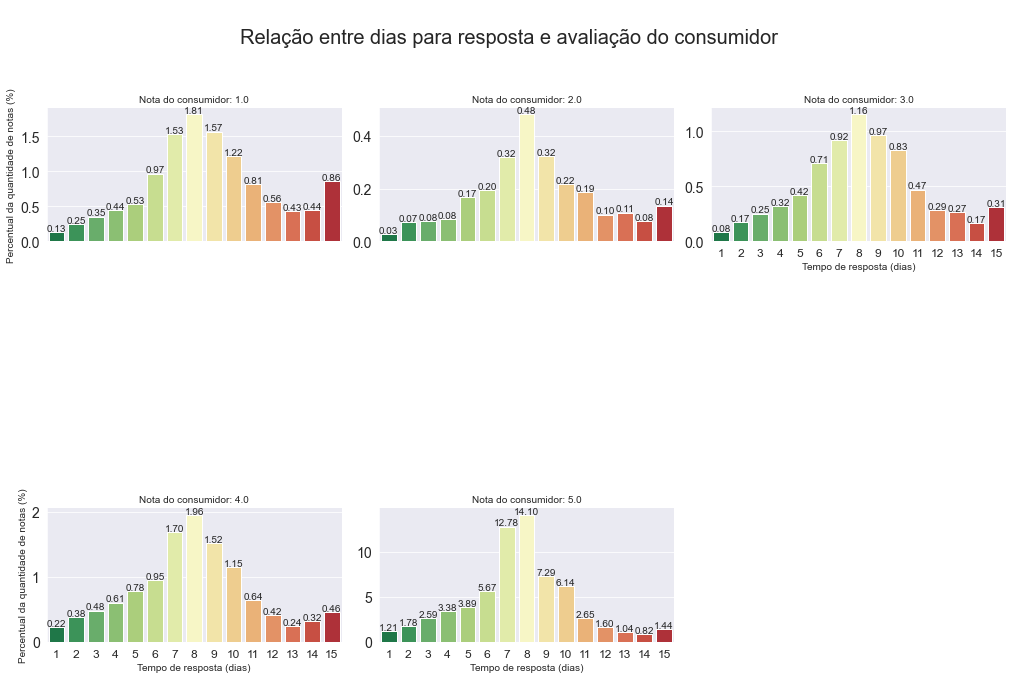

In [148]:
df_tempo_nota = df[['Nota do Consumidor', 'Tempo Resposta']] > 0 
df_tempo_nota = df[df_tempo_nota]
df_tempo_nota_valores = df_tempo_nota.groupby('Tempo Resposta')['Nota do Consumidor'].value_counts()
df_tempo_nota_perc = pd.DataFrame(df_tempo_nota_valores)

df_tempo_nota_perc.rename(columns={'Nota do Consumidor': 'Qtde de Notas'}, inplace=True)

df_tempo_nota_perc.reset_index(inplace=True)

soma_tempo_nota_valores = df_tempo_nota_valores.sum()

df_tempo_nota_perc['%'] = df_tempo_nota_perc['Qtde de Notas'] / soma_tempo_nota_valores * 100

plot = sns.FacetGrid(df_tempo_nota_perc, col='Nota do Consumidor', height=4.7, sharey=False, col_wrap=3)

plot.map_dataframe(sns.barplot, x='Tempo Resposta', y='%', 
         palette = 'RdYlGn_r',
         order = [1,2,3,4,5,6,7,8,9,10,11,12,13,14,15])

for ax in plot.axes.ravel():
  for i in ax.patches:
    ax.annotate(format(i.get_height(), '.2f'),
                (i.get_x() + i.get_width() / 2, i.get_height()), 
                ha = 'center',
                va = 'baseline',
                fontsize = 10,
                #color = 'black',
                xytext = (0, 1),
                textcoords = 'offset points')

plot.set_axis_labels("Tempo de resposta (dias)", "Percentual da quantidade de notas (%)")
plot.set_titles(col_template = "Nota do consumidor: {col_name}")
plot.fig.subplots_adjust(top = 0.83)
plot.fig.suptitle('\nRelação entre dias para resposta e avaliação do consumidor', fontsize = 20)

print('\nMédia de dias entre abertura de reclamação e resposta: ', df_tempo_media)

A relação entre tempo de resposta e nota do consumidor confirmou a **média de 8 dias para resposta independente da nota atribuída**, porém para avaliação 1.0 observa-se uma alta no percentual de notas para o tempo de resposta de 15 dias, assim como para avaliação 5.0 o tempo de resposta de 8 dias é onde se concentra o maior percentual de notas. 

## 12. Qual a quantidade/percentual das reclamações resolvidas, não resolvidas, não avaliadas e canceladas/encerradas?

               Avaliação Reclamação          %
Resolvida                     23436  46.813951
Não Avaliada                  17461  34.878750
Cancelada                      5929  11.843314
Não Resolvida                  3142   6.276217
Encerrada                        94   0.187767


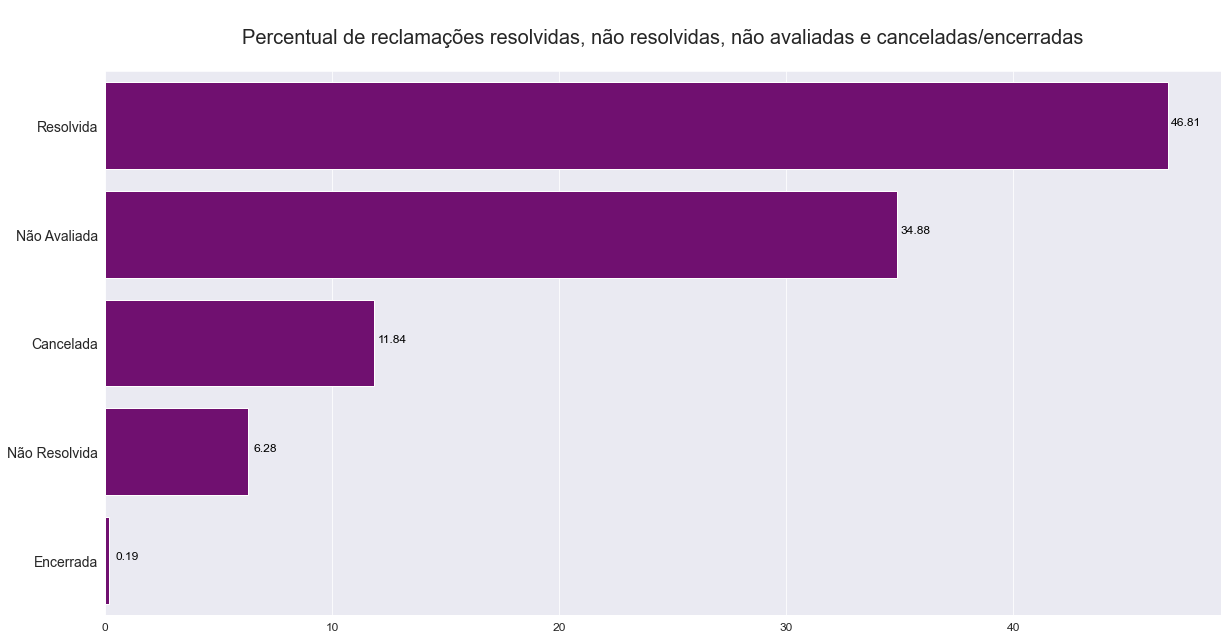

In [30]:
df_avaliacao_valores = df['Avaliação Reclamação'].value_counts()
df_avaliacao_perc = pd.DataFrame(df_avaliacao_valores)

soma_avaliacao_valores = df_avaliacao_valores.sum()

df_avaliacao_perc['%'] = df_avaliacao_perc['Avaliação Reclamação'] / soma_avaliacao_valores * 100

print(df_avaliacao_perc)

df_avaliacao_perc['Avaliação Reclamação'] = df_avaliacao_perc.index

plt.figure(figsize = (20, 10))
plt.rcParams['ytick.labelsize'] = 14
plot = sns.barplot(data = df_avaliacao_perc,
                    x = '%', y = 'Avaliação Reclamação',
                    orient = 'h',
                    palette = ['purple'])
for i in plot.patches:
    plot.annotate(format(i.get_width(), '.2f'),
                (i.get_width() + 0.8, i.get_y() + i.get_height() / 2),
                ha = 'center',
                va = 'baseline',
                fontsize = 12,
                color = 'black',
                xytext = (0,1),
                textcoords = 'offset points')
plt.xlabel('')
plt.ylabel('')
plt.title('\nPercentual de reclamações resolvidas, não resolvidas, não avaliadas e canceladas/encerradas\n', fontsize = 20)
plt.show(plot)

**46,81% das reclamações foram resolvidas**, 34,88% foram finalizadas porém não avaliadas, 11,84% das reclamações foram canceladas por serem improcedentes, **6,28% não foram resolvidas** e 0,19% foram encerradas por não tererm sido avaliadas como procedente ou improcedente.

## 13. Qual o número/percentual de recusa de reclamações avaliadas como procedentes e improcedentes?

                Análise da Recusa          %
Não Contestada              43220  86.332947
Procedente                   5878  11.741441
Improcedente                  870   1.737845
Encerrada                      94   0.187767


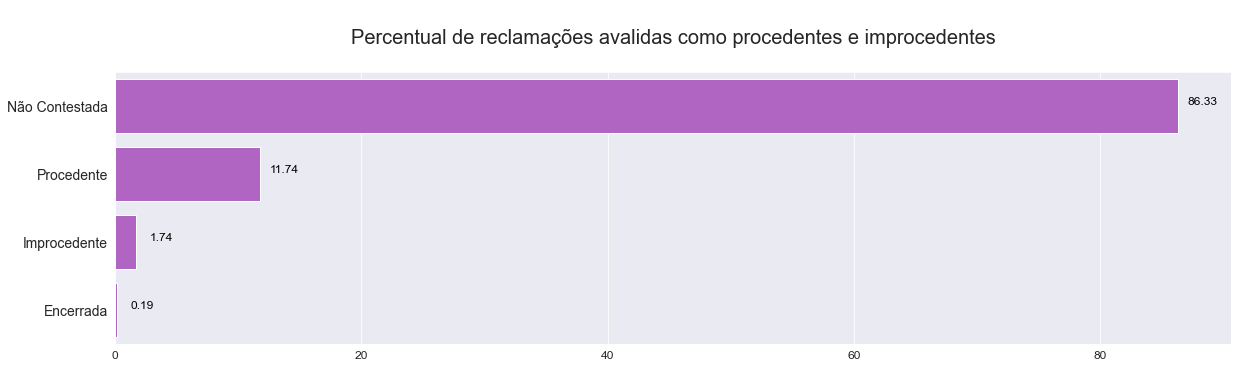

In [31]:
df_recusa_valores = df['Análise da Recusa'].value_counts()
df_recusa_perc = pd.DataFrame(df_recusa_valores)

soma_recusa_valores = df_recusa_valores.sum()

df_recusa_perc['%'] = df_recusa_perc['Análise da Recusa'] / soma_recusa_valores * 100

print(df_recusa_perc)

df_recusa_perc['Análise da Recusa'] = df_recusa_perc.index

plt.figure(figsize = (20, 5))
plot = sns.barplot(data = df_recusa_perc,
                    x = '%', y = 'Análise da Recusa',
                    orient = 'h',
                    palette = ['mediumorchid'])
for i in plot.patches:
    plot.annotate(format(i.get_width(), '.2f'),
                (i.get_width() + 2, i.get_y() + i.get_height() / 2),
                ha = 'center',
                va = 'baseline',
                fontsize = 12,
                color = 'black',
                xytext = (0,1),
                textcoords = 'offset points')
plt.xlabel('')
plt.ylabel('')
plt.title('\nPercentual de reclamações avalidas como procedentes e improcedentes\n', fontsize = 20)
plt.show(plot)

86,33% das reclamações não foram contestadas, **11,74% das reclamações foram consideradas inválidas**, 1,74% foram consideradas válidas e 0,19% não houve avaliação.